<a href="https://colab.research.google.com/github/Goro-python/my_NLP/blob/next_dev/Copy_of_ChartoChar_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# seq to seq model :  English to French Character


In [2]:
# !!curl -O http://www.manythings.org/anki/fra-eng.zip
# !!unzip fra-eng.zip

In [3]:
with open("fra.txt", "r", encoding="utf-8") as f:
  lines = f.read().split("\n")
DataSize = 10000

In [4]:
for line in lines[0:2]:
  print(line)
  

Go.	Va !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)
Hi.	Salut !	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)


In [5]:
import numpy as np
np.random.seed(1)
batch_size = 64 
epochs = 100  
latent_dim = 256  
trainSize =  10000
valSize   =  1000
testSize  =  1000

engSent = []
frenSent = []

for line in lines[:DataSize+1]:
  english,french,_= line.split("\t")
  engSent.append(english)
  frenSent.append("\t" + french + "\n")   # extra appended

print("Number of English Sentence: ",len(engSent))
print("Number of French Senttence: ",len(frenSent))

trainIndexes = np.random.randint(DataSize, size=(trainSize))
valIndexes =   np.random.randint(DataSize, size=(valSize))
testIndexes =    np.random.randint(DataSize, size=(testSize))
#index = np.random.randint(0,trainSamples)

def setData(indexes):
  X = []
  Y = []
  for ind in indexes:
    X.append(engSent[ind])
    Y.append(frenSent[ind])
  return [X,Y]

Xtrain, Ytrain =  setData(trainIndexes)
Xval,Yval =       setData(valIndexes)      
Xtest, Ytest =    setData(testIndexes)


ind = np.random.randint(trainSize-1)
print(ind)
Xtrain[ind]
Ytrain[ind]


Number of English Sentence:  10001
Number of French Senttence:  10001
8267


'\tAttends un peu.\n'

In [6]:
"\t" + frenSent[1] + "\n"

'\t\tSalut !\n\n'

In [7]:
from collections import defaultdict
class convTable(object):
  def __init__(self,engSent,frenSent):
    self.engSent = engSent
    self.frenSent = frenSent
    self.engDict   =   defaultdict(int) 
    self.engRevDict =  defaultdict(str)
    self.frenDict  =   defaultdict(int)
    self.frenRevDict = defaultdict(str)
    self.maxEngSent =  0
    self.maxFrenSent = 0

  def createEngDict(self):
    _dict = set();
    for sent in self.engSent:
      for ch in sent:
        _dict.add(ch)
    _dict = sorted(list(_dict))
    print(_dict)
    for i,ch in enumerate(_dict):
      self.engDict[ch] = i
      self.engRevDict[i] = ch
    print(self.engDict)

  def createFrenDict(self):
    _dict = set();
    for sent in self.frenSent:
      for ch in sent:
        _dict.add(ch)
    _dict = sorted(list(_dict))
    for i,ch in enumerate(_dict):
      self.frenDict[ch] = i
      self.frenRevDict[i] = ch

  def findMaxEngLength(self):
    for sent in self.engSent:
      self.maxEngSent= max(self.maxEngSent,len(sent)) 

  def findMaxFrenLength(self):
    self.maxFrenSent = max(len(sent) for  sent in self.frenSent)

      

  def convertExptoArr(self,sentence,langFlag):
      # langFlag = 1 for English, 0 for french
      if langFlag:
        X = np.zeros((self.maxEngSent,len(self.engDict)))
        for i,ch in enumerate(sentence):
          X[i,self.engDict[ch]] = 1
        X[i+1:,self.engDict[" "]] = 1
        return X
      else:
        X = np.zeros((self.maxFrenSent,len(self.frenDict)))
        for i,ch in enumerate(sentence):
          X[i,self.frenDict[ch]] = 1
        X[i+1:,self.frenDict[" "]] = 1
        return X


  def convertArrtoExp(self,Arr,langFlag):
    exp = ""
    if langFlag:
      maxArr = np.argmax(Arr,axis = 1)
      maxArr=maxArr.flatten()
      for index in maxArr:      
        exp+=self.engRevDict[index]
      return exp
    else:
      maxArr = np.argmax(Arr,axis = 1)
      maxArr=maxArr.flatten()
      for index in maxArr:      
        exp+=self.frenRevDict[index]
      return exp







    


In [8]:
ct = convTable(engSent,frenSent)
ct.createEngDict()
ct.createFrenDict()
ct.findMaxEngLength()
ct.findMaxFrenLength()

[' ', '!', '$', '%', '&', "'", ',', '-', '.', '0', '1', '2', '3', '5', '6', '7', '8', '9', ':', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'é']
defaultdict(<class 'int'>, {' ': 0, '!': 1, '$': 2, '%': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '0': 9, '1': 10, '2': 11, '3': 12, '5': 13, '6': 14, '7': 15, '8': 16, '9': 17, ':': 18, '?': 19, 'A': 20, 'B': 21, 'C': 22, 'D': 23, 'E': 24, 'F': 25, 'G': 26, 'H': 27, 'I': 28, 'J': 29, 'K': 30, 'L': 31, 'M': 32, 'N': 33, 'O': 34, 'P': 35, 'Q': 36, 'R': 37, 'S': 38, 'T': 39, 'U': 40, 'V': 41, 'W': 42, 'Y': 43, 'a': 44, 'b': 45, 'c': 46, 'd': 47, 'e': 48, 'f': 49, 'g': 50, 'h': 51, 'i': 52, 'j': 53, 'k': 54, 'l': 55, 'm': 56, 'n': 57, 'o': 58, 'p': 59, 'q': 60, 'r': 61, 's': 62, 't': 63, 'u': 64, 'v': 65, 'w': 66, 'x': 67, 'y': 68, 'z': 

In [9]:
ct.maxEngSent

15

In [10]:
Ytemp = ct.convertExptoArr(Ytrain[0],0)

In [11]:
Ytemp.shape

(59, 94)

In [12]:
ct.convertArrtoExp(Ytemp,0)

'\tÀ plus tard !\n                                            '

In [13]:
def createData(X,Y):
  XData = []
  YData = []
  for i in range(len(X)):
    XData.append(list(ct.convertExptoArr(X[i],1)))
    YData.append(list(ct.convertExptoArr(Y[i],0)))
  return [np.array(XData),np.array(YData)]


Xtr, Ytr =  createData(Xtrain,Ytrain)
#Xv, Yv =    createData(Xval,Yval)
#Xtst,Ytst = createData(Xtest,Ytest)





  

In [14]:
Ytr

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0.

In [15]:
def decoderTarget(Y):
  x,y,z = Y.shape
  decoderTarget = np.zeros((x,y,z))
  for i in range(x):
    decoderTarget[i,0:y-1,:] = Y[i,1:,:]
    temp = np.zeros((1,z))
    temp[0,ct.frenDict[" "]] = 1
    decoderTarget[i,-1,:] = temp
  return decoderTarget

In [16]:
Ytarget = decoderTarget(Ytr)
Yinput = Ytr
Xinput = Xtr

In [17]:
Ytarget.shape

(10000, 59, 94)

In [18]:
ct.convertArrtoExp(Ytarget[1],0)

'Tu es folle\u202f?\n                                             '

In [19]:
Ytrain[0]

'\tÀ plus tard !\n'

In [20]:
ct.maxFrenSent

59

In [21]:
import tensorflow as tf
from tensorflow import keras

class EngtoFrenchModel(object):

  def __init__(self):
    self.EngtoFrench = None
    self.num_encoder_tokens = len(ct.engDict)
    self.num_decoder_tokens = len(ct.frenDict)
    self.encoder_model = None
    self.decoder_model = None

  def createModel(self):
    # Define an input sequence and process it.
    encoder_inputs = keras.Input(shape=(None, self.num_encoder_tokens))
    encoder = keras.layers.LSTM(latent_dim, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)

    # We discard `encoder_outputs` and only keep the states.
    encoder_states = [state_h, state_c]

    # Set up the decoder, using `encoder_states` as initial state.
    decoder_inputs = keras.Input(shape=(None, self.num_decoder_tokens))

    # We set up our decoder to return full output sequences,
    # and to return internal states as well. We don't use the
    # return states in the training model, but we will use them in inference.
    decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = keras.layers.Dense(self.num_decoder_tokens, activation="softmax")
    decoder_outputs = decoder_dense(decoder_outputs)

    # Define the model that will turn
    # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
    model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
    self.EngtoFrench = model
    self.EngtoFrench.summary()
    keras.utils.plot_model(model, show_shapes=True)
    

  def trainModel(self,Xinput,Yinput,Ytarget):
    self.EngtoFrench.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    self.EngtoFrench.fit([Xinput, Yinput],Ytarget,batch_size=batch_size,epochs=60,validation_split = 0.05) 
    # Save model
    self.EngtoFrench.save("EngtoFrenModel")

  def modelInference(self):

    # encoder model 
    #model = keras.models.load_model("EngtoFrenModel")
    model = self.EngtoFrench
    encoder_inputs = model.input[0]  # input_1
    encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
    encoder_states = [state_h_enc, state_c_enc]
    self.encoder_model = keras.Model(encoder_inputs, encoder_states)


    # decoder model 

    decoder_inputs = model.input[1]  # input_2   # the first blank signal <SOS>
    decoder_state_input_h = keras.Input(shape=(latent_dim,), name="input_31")
    decoder_state_input_c = keras.Input(shape=(latent_dim,), name="input_41")
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]  # should come from encoder
    decoder_lstm = model.layers[3]
    decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
      decoder_inputs, initial_state=decoder_states_inputs
    )
    decoder_states = [state_h_dec, state_c_dec]    # for next stage 
    decoder_dense = model.layers[4]                # output
    decoder_outputs = decoder_dense(decoder_outputs)
    self.decoder_model = keras.Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
    )

  def convertEngtoFren(self,input_seq):
    states_value = self.encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, self.num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, ct.engDict["\t"]] = 1.0

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, c = self.decoder_model.predict([target_seq] + states_value)
        #print(output_tokens.shape)
        #print(h.shape)
        #print(c.shape)
        
        # Sample a token
        sampled_token_index =  np.argmax(output_tokens[0, -1, :])
        sampled_char  =        ct.frenRevDict[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == "\n" or len(decoded_sentence) > ct.maxFrenSent:
            stop_condition = True
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, self.num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        states_value = [h, c]
    return decoded_sentence

    
    

    


    







In [22]:
eft = EngtoFrenchModel()
eft.createModel()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 71)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 94)]   0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 256), (None, 335872      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 256),  359424      input_2[0][0]                    
                                                                 lstm[0][1]            

In [23]:
#


In [24]:
eft.trainModel(Xinput,Yinput,Ytarget)

Epoch 1/60
149/149 [==============================] - 2s 16ms/step - loss: 1.2934 - accuracy: 0.7186 - val_loss: 0.9638 - val_accuracy: 0.7322
Epoch 2/60
149/149 [==============================] - 2s 11ms/step - loss: 0.8682 - accuracy: 0.7616 - val_loss: 0.8025 - val_accuracy: 0.7850
Epoch 3/60
149/149 [==============================] - 2s 11ms/step - loss: 0.7192 - accuracy: 0.8018 - val_loss: 0.6760 - val_accuracy: 0.8120
Epoch 4/60
149/149 [==============================] - 2s 11ms/step - loss: 0.7003 - accuracy: 0.8046 - val_loss: 0.6447 - val_accuracy: 0.8175
Epoch 5/60
149/149 [==============================] - 2s 11ms/step - loss: 0.6094 - accuracy: 0.8245 - val_loss: 0.6047 - val_accuracy: 0.8249
Epoch 6/60
149/149 [==============================] - 2s 11ms/step - loss: 0.5775 - accuracy: 0.8316 - val_loss: 0.5780 - val_accuracy: 0.8322
Epoch 7/60
149/149 [==============================] - 2s 11ms/step - loss: 0.5522 - accuracy: 0.8383 - val_loss: 0.5579 - val_accuracy: 0.8373

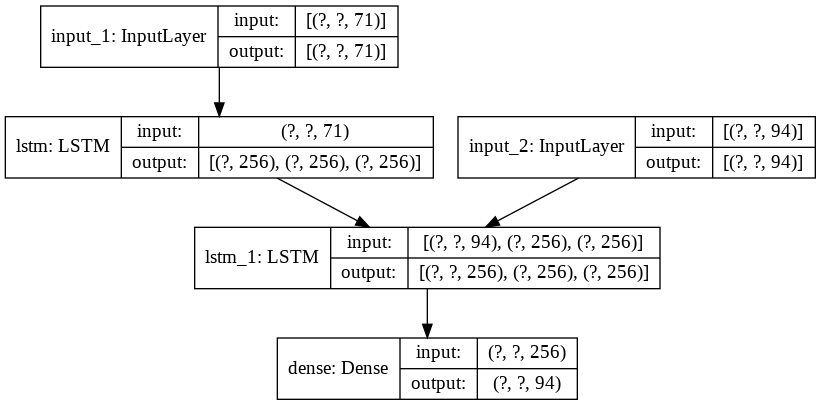

In [25]:
keras.utils.plot_model(eft.EngtoFrench, show_shapes=True)

In [26]:
eft.modelInference()

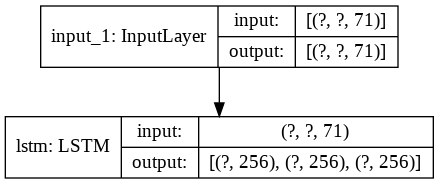

In [27]:
keras.utils.plot_model(eft.encoder_model, show_shapes=True)

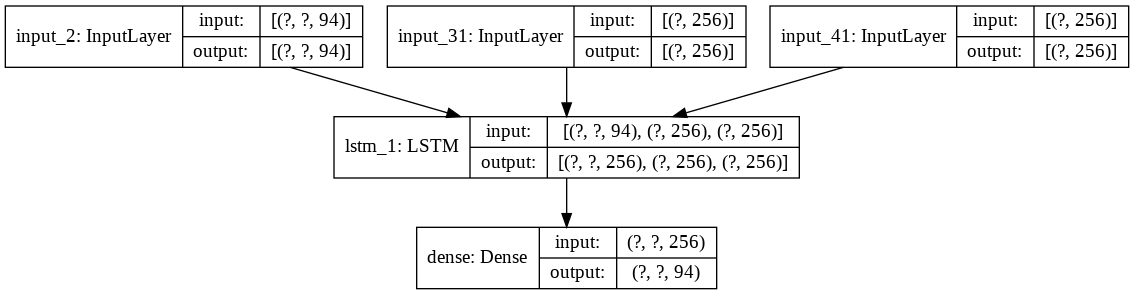

In [28]:
keras.utils.plot_model(eft.decoder_model, show_shapes=True)


In [29]:
Xinput.shape
outputs = eft.encoder_model.predict(Xinput[:1,:,:])

In [30]:
outputs[1].shape

(1, 256)

In [31]:
X= [1,2]
Y = [1,2]

In [72]:
Ypred = eft.convertEngtoFren(Xinput[8:9,:,:])
print(Ypred)

Pourriez-vous nous aider ?



In [33]:
Xinput[4:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [34]:
ct.Xtr[0]

AttributeError: ignored

In [73]:
 print(ct.convertArrtoExp(Ytr[8],0))

	Pourrais-tu nous aider ?
                                 


In [79]:
print(ct.convertArrtoExp(Xtr[7],1))

I'm starving.  


In [63]:
# arbitrary  sentence 


In [76]:
eft.trainModel(Xinput,Yinput,Ytarget)

Epoch 1/60
149/149 [==============================] - 2s 16ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.2459 - val_accuracy: 0.9570
Epoch 2/60
149/149 [==============================] - 2s 11ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.2462 - val_accuracy: 0.9578
Epoch 3/60
149/149 [==============================] - 2s 11ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.2491 - val_accuracy: 0.9581
Epoch 4/60
149/149 [==============================] - 2s 11ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.2493 - val_accuracy: 0.9582
Epoch 5/60
149/149 [==============================] - 2s 11ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.2525 - val_accuracy: 0.9577
Epoch 6/60
149/149 [==============================] - 2s 11ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.2433 - val_accuracy: 0.9586
Epoch 7/60
149/149 [==============================] - 2s 11ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.2467 - val_accuracy: 0.9591

In [78]:
Ypred = eft.convertEngtoFren(Xinput[7:8,:,:])
print(Ypred)

J'ai la fringale.

